# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/data_df.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'e2ab951ed34af89ed9a79e83f9faf65c'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

counter = 1
set = 1
query_url = f"{url}appid={api_key}&units={units}&q="
lat =[]
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
city = []
country = []
date = []
temp_max=[]

for x in cities:
    try:
        response = requests.get(query_url + x)
        data = response.json()
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        temp.append(data["main"]["temp"])
        temp_max.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind_speed.append(data["wind"]["speed"])
        city.append(data["name"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        
        print(f"Processing Record {counter} of set {set} | {x}" )
       
        if counter < 50:
            counter = counter + 1
        else:
            set = set + 1
            counter=1
                 
    except:
        print("city not found. skipping.....")
print("------------------------------\nData Retrieval Complete\n------------------------------")



Processing Record 1 of set 1 | ribeira grande
Processing Record 2 of set 1 | puerto ayora
Processing Record 3 of set 1 | tiksi
Processing Record 4 of set 1 | guerrero negro
Processing Record 5 of set 1 | atbasar
Processing Record 6 of set 1 | mount gambier
Processing Record 7 of set 1 | jamestown
city not found. skipping.....
Processing Record 8 of set 1 | port elizabeth
Processing Record 9 of set 1 | la asuncion
Processing Record 10 of set 1 | shellbrook
Processing Record 11 of set 1 | corrales
Processing Record 12 of set 1 | punta arenas
Processing Record 13 of set 1 | kayes
Processing Record 14 of set 1 | clyde river
Processing Record 15 of set 1 | arraial do cabo
city not found. skipping.....
Processing Record 16 of set 1 | sale
Processing Record 17 of set 1 | east london
Processing Record 18 of set 1 | kodiak
Processing Record 19 of set 1 | rikitea
Processing Record 20 of set 1 | amarpur
city not found. skipping.....
Processing Record 21 of set 1 | chickasha
Processing Record 22 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
new_data = {
    "City": city,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp":temp_max,
    "Wind Speed": wind_speed
}

data_df = pd.DataFrame(new_data)
data_df.to_csv("../output_data_file.csv")

data_df.head()
len(city)

549

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

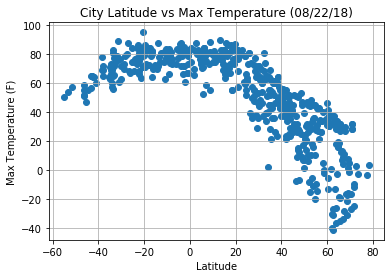

In [4]:
plt.scatter(lat,temp_max)
plt.title("City Latitude vs Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/Temp_InCities.png")


#### Latitude vs. Humidity Plot

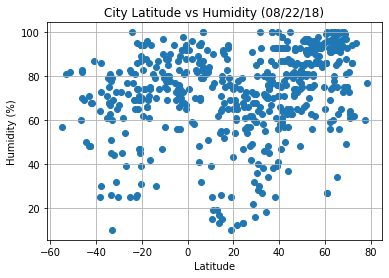

In [5]:
plt.scatter(lat,humidity)
plt.title("City Latitude vs Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Humidity_InCities.png")

#### Latitude vs. Cloudiness Plot

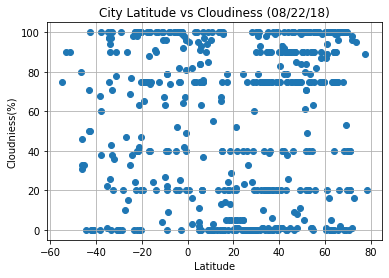

In [6]:
plt.scatter(lat,cloudiness)
plt.title("City Latitude vs Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudniess(%)")
plt.grid()
plt.savefig("../Images/cloudiness_InCities.png")

#### Latitude vs. Wind Speed Plot

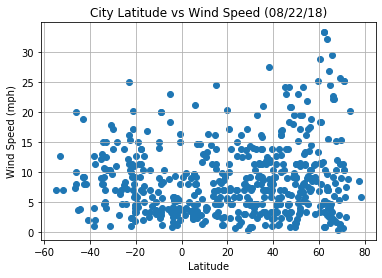

In [7]:
plt.scatter(lat,wind_speed)
plt.title("City Latitude vs Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/windspeed_InCities.png")

Observations: 

1.) Temperature and latitude seems to have clear relationship.As you move closer to the Equator, the temperature gets significantly higher. 

2.) Based this time period, the southern hemisphere gets warmer wile the temparture in the northern hemisphere gets colder. 

3.) There seems to be no clear relationship between latitude and cloudiness,wind speed or humiditity. However, there are a few cluster in the Humidity chart. 
